In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load dataset
df_new = pd.read_csv(r"E:\Spectrum\Project 6\Dataset\loan_approval_dataset.csv")

# Preview dataset
df_new.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Check data types and missing values
df_new.info()
df_new.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
print(df_new.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [8]:
# Clean column names (remove spaces, lowercase)
df_new.columns = df_new.columns.str.strip().str.lower()

# Encode loan_status to numeric
df_new['loan_status'] = df_new['loan_status'].apply(lambda x: 1 if str(x).strip().lower() == 'approved' else 0)

# Verify
print(df_new['loan_status'].value_counts())


loan_status
1    2656
0    1613
Name: count, dtype: int64


In [9]:
# Drop the ID column (it has no predictive value)
df_new.drop('loan_id', axis=1, inplace=True)

# Numeric features
numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Categorical features
categorical_cols = ['education', 'self_employed']

print("Numeric Features:", numeric_cols)
print("Categorical Features:", categorical_cols)


Numeric Features: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Features: ['education', 'self_employed']


In [10]:
# Separate groups
approved = df_new[df_new['loan_status'] == 1]
not_approved = df_new[df_new['loan_status'] == 0]

# T-test results storage
t_test_results = []

for col in numeric_cols:
    stat, pval = ttest_ind(approved[col], not_approved[col], equal_var=False)
    t_test_results.append({
        'Feature': col,
        'Approved_Mean': approved[col].mean(),
        'Not_Approved_Mean': not_approved[col].mean(),
        'T-Statistic': stat,
        'P-Value': pval,
        'Significant (p<0.05)': 'Yes' if pval < 0.05 else 'No'
    })

# Create results DataFrame
ttest_df = pd.DataFrame(t_test_results)
ttest_df.sort_values('P-Value', inplace=True)
ttest_df.reset_index(drop=True, inplace=True)

# Display results
ttest_df


,Feature,Approved_Mean,Not_Approved_Mean,T-Statistic,P-Value,Significant (p<0.05)
0,cibil_score,7.034620e+02,4.294681e+02,87.896346,0.000000e+00,Yes
1,loan_term,1.039759e+01,1.172846e+01,-7.615991,3.309049e-14,Yes
2,no_of_dependents,2.474774e+00,2.538128e+00,-1.183217,2.368061e-01,No
3,loan_amount,1.524725e+07,1.494606e+07,1.068941,2.851689e-01,No
4,luxury_assets_value,1.501660e+07,1.530694e+07,-1.013970,3.106683e-01,No
5,income_annum,5.025904e+06,5.113825e+06,-0.997017,3.188263e-01,No
6,residential_assets_value,7.399812e+06,7.592498e+06,-0.938330,3.481416e-01,No
7,commercial_assets_value,5.001355e+06,4.926720e+06,0.538774,5.900779e-01,No
8,bank_asset_value,4.959526e+06,5.004960e+06,-0.444862,6.564476e-01,No


In [12]:
anova_results = []

# Only run ANOVA if categorical feature has >2 categories
for cat in categorical_cols:
    if df_new[cat].nunique() > 2:
        for num in ['income_annum', 'cibil_score']:
            groups = [df_new[df_new[cat] == level][num] for level in df_new[cat].unique()]
            f_stat, p_val = f_oneway(*groups)
            anova_results.append({
                'Categorical Feature': cat,
                'Numeric Feature': num,
                'F-Statistic': f_stat,
                'P-Value': p_val,
                'Significant (p<0.05)': 'Yes' if p_val < 0.05 else 'No'
            })

# Convert only if results exist
if len(anova_results) > 0:
    anova_df = pd.DataFrame(anova_results)
    anova_df.sort_values('P-Value', inplace=True)
    display(anova_df)
else:
    print("No ANOVA performed (categorical features have <=2 levels).")


No ANOVA performed (categorical features have <=2 levels).


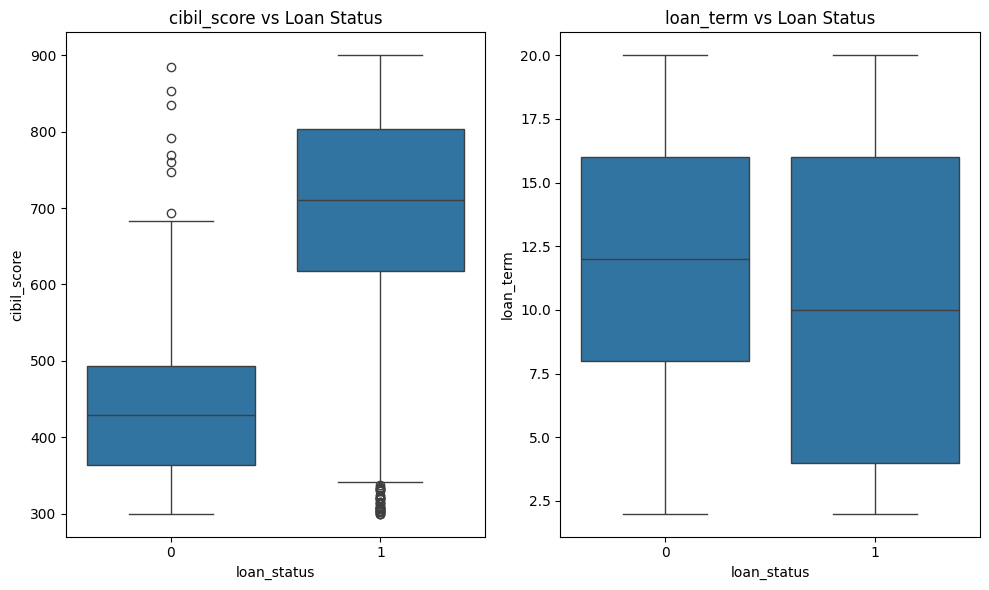

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 2 significant features
top_features = ['cibil_score', 'loan_term']

plt.figure(figsize=(10, 6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='loan_status', y=feature, data=df_new)
    plt.title(f'{feature} vs Loan Status')
plt.tight_layout()
plt.show()
